<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab8_1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


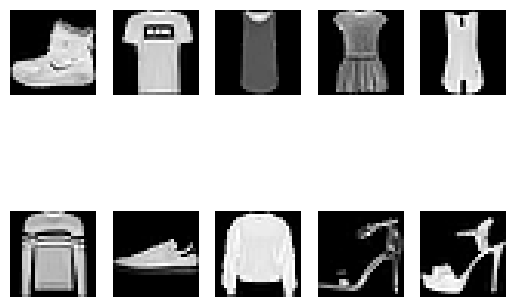

In [11]:
# Роздрукувати 10 зображень:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [3]:
# Масштабування даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Архітектура нейронної мережі
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#Використання ранньої зупинки та зменшення швидкості навчання:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),
                    callbacks=[early_stop, reduce_lr])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7670 - loss: 0.6689 - val_accuracy: 0.8450 - val_loss: 0.4339 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8536 - loss: 0.4078 - val_accuracy: 0.8468 - val_loss: 0.4162 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8620 - loss: 0.3760 - val_accuracy: 0.8656 - val_loss: 0.3703 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8722 - loss: 0.3464 - val_accuracy: 0.8664 - val_loss: 0.3670 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8766 - loss: 0.3313 - val_accuracy: 0.8655 - val_loss: 0.3728 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8815 - loss: 0.3192 - val_accuracy: 0.8737 - val_loss: 0.3541 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8836 -

In [5]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [6]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')


Mounted at /content/drive


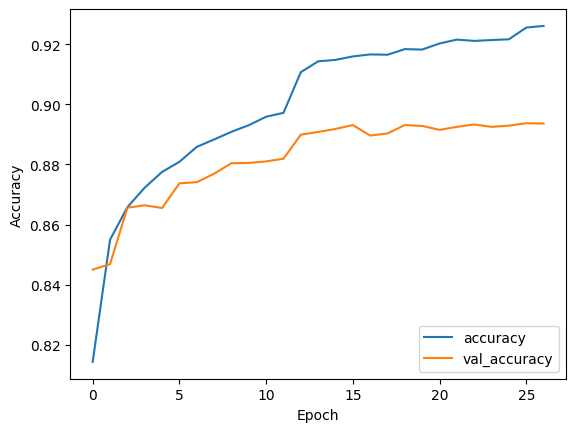

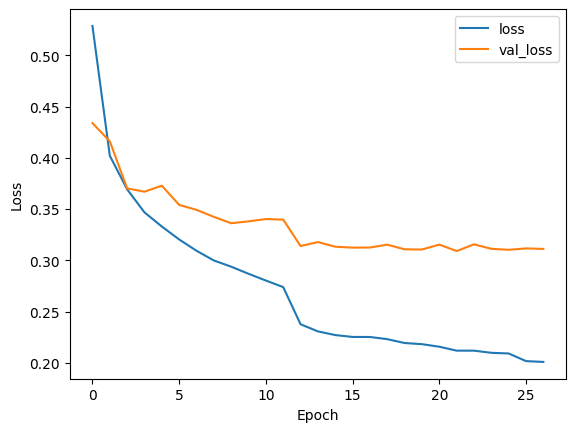

In [12]:
# Побудувати графіки функції втрат і точності:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [8]:
# Вивести класифікаційний звіт:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.79      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.79      0.84      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.70      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



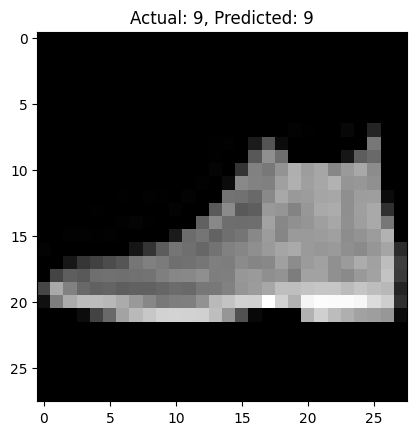

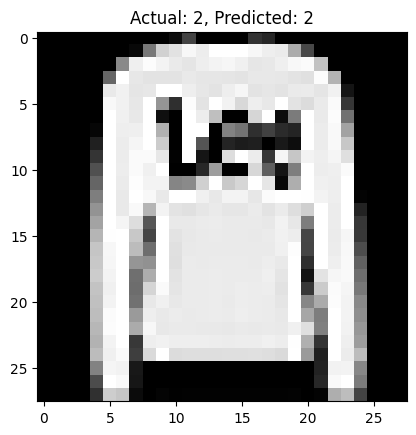

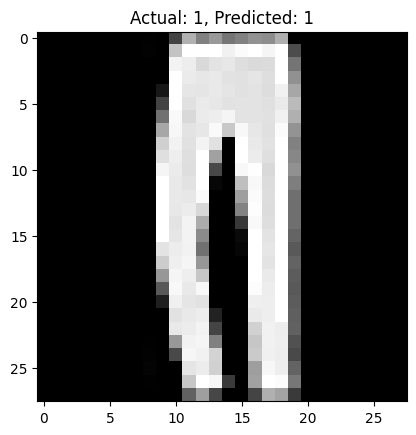

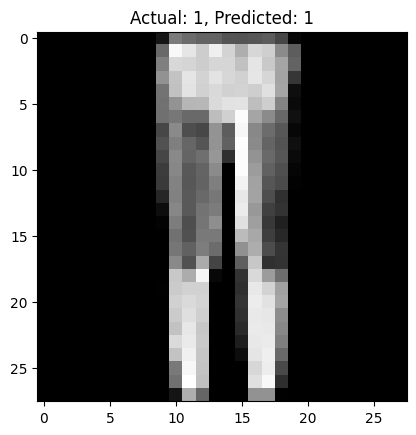

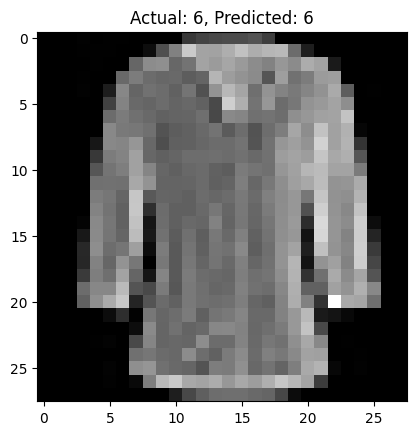

In [9]:
# Вивести результати розпізнавання із прогнозованим і справжнім класом:
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual: {y_test[i]}, Predicted: {y_pred_classes[i]}')
    plt.show()


Висновки
Модель пройшла 27 епох навчання, демонструючи поступове покращення точності. Фінальна точність на тренувальних даних досягла 92.80%, а на валідаційних - 89.36%. Архітектура моделі складається з трьох шарів (Flatten, Dense з 128 нейронами та вихідний Dense з 10 нейронами) і використовує dropout для запобігання перенавчанню. Загальна кількість параметрів моделі - 305,312.
На тестовому наборі даних модель показала загальну точність 89%. Ефективність класифікації варіюється залежно від класу: найкращі результати (F1-score 0.95-0.98) досягнуті для класів 1, 5, 7, 8 і 9 (ймовірно, штани, сандалі, сумки та черевики), тоді як найскладнішим виявився клас 6 (можливо, сорочки) з F1-score 0.72

